<a href="https://colab.research.google.com/github/DiegoMoreno1110/Aprendizaje_Maquina/blob/master/Template_Entrega_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://becasparatodos.com/wp-content/uploads/2017/01/tec-de-monterrey-maestr%C3%ADas.jpg" style="width: 400px;"/>

<h2><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h2>

<h4><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Final Project - Evaluation</center></h4>
    
<h4><center>Date: November 13, 2020</center></h4>
<h4><center><font color="red">Submit: November 24, 2020</font></center></h4>

---

<h4>Grade: </h4>

---
<h4><center>Student's information</center></h4>
<table>
    <tr>
    <th>Name</th>
    <th>Student ID</th>
    <th>Github</th>
  </tr>
  <tr>
    <td>J. Iván Morales</td>
    <td>A01652650</td>
    <td>github.com/ivansmorales</td>
  </tr>
  <tr>
    <td>Yair Pimentel Vanegas</td>
    <td>A01652823</td>
    <td>github.com/Yair0</td>
  </tr>
  <tr>
    <td>Jorge Germán Reyes García</td>
    <td>A01336637</td>
    <td>github.com/germanreyga</td>
  </tr>
  <tr>
    <td>Diego Moreno Rodríguez</td>
    <td>A01337594</td>
    <td>github.com/DiegoMoreno1110</td>
  </tr>
  <tr>
    <td>Kevin A. Ruvalcaba</td>
    <td>A01652241 </td>
    <td>github.com/KevinRuvalcaba </td>
  </tr>
</table>

<center>Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este proyecto esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este proyecto de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.</center>

## <font color="brown">Proyecto Final - Aprendizaje Máquina</font>

---

Indicaciones: El proyecto seleccionado será desarrollado siguiendo ciertas condiciones. Deberán seguir la estructura recomendada (pero podrán cambiar títulos, es sólo una sugerencia) y podrán añadir secciones en caso de que ser necesario.

* La entrega límite de entrega de la notebook será: Martes 24 de noviembre.
* Deberán realizar una exposición (entre 10 y 20 minutos a lo mucho), donde proporcionen una explicación acerca de la metodología implementada y los resultados obtenidos.

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.
En caso de no tener la información aquí solicitada, no se evaluará el proyecto.

<a id="general"></a>
### Contenido

-----

1. [Objetivo](#a)

2. [Exploración de Datos](#b)
    * Detección de valores faltantes
    * Agregando valores
    * Visualizando datos
    * Preprocesamiento de datos
        * Reducción de dimensiones
        
-----
3. [Selección de modelos](#c)
    * Aprendizaje No Supervisado / Supervisado
        * Selección de modelo
        * Selección de hiperparámetros
        * Entrenamiento
        * Prueba
        * Resultados
-----

4. [Conclusiones](#d)

-----

<a id="a"></a>
### 1. Objetivo

---
[Regresar a contenido](#general)

Esta notebook tiene la finalidad de presentar y describir todo el enfoque para modelar problemas en el campo de la ciencia de datos, que va desde el análisis exploratorio de datos hasta la aplicación de técnicas de aprendizaje supervisado y no supervisado para poder generar una predicción sobre dicho tipo de datos.

El desarrollo de esta notebook está dirigido principalmente para explorar de manera detallada las etapas que se realizan en los problemas de Ciencia de Datos y Aprendizaje Máquina (y posiblemente en Aprendizaje Profundo) que cubre la obtención y analisis de los datos, tecnicas para poder visualizarlos y realizar un pre-procesamiento de estos para posteriormente ser usados para generar modelos de Aprendizaje Máquina.

**Implementar y entrenar un modelo para detectar algún sentimiento mediante el reconocimiento facial.**


<a id="b"></a>
### 2. Exploración de Datos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación del conjunto de datos a utilizar. Así como tener un orden al momento de importar librerías, mostrar gráficos del EDA y preprocesamiento de los datos.

**El conjunto de datos (imágenes de emociones) se extrajo de aquí:** https://www.kaggle.com/msambare/fer2013

**Las siguientes librerías se utilizaron para el manejo de datos, creación de gráficos, procesamiento de imágenes, entrenamiento del modelo.**

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras import model


In [ ]:
train_dir = 'data/train/'
test_dir = 'data/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

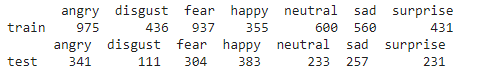

In [ ]:
train_count.transpose().plot(kind='bar')

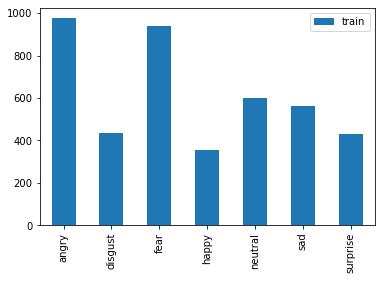

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

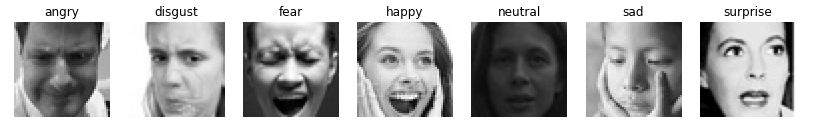



from keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras import regularizers<a id="c"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación de la metodología de aprendizaje automático. En caso de aplicar un **pipeline** de aprendizaje no supervisado y / o supervisado, que tenga un orden claro y expliquen el porqué de su aplicación con lo que han percibido de sus datos. 

El modelo seleccionado, qué parámetros o hiperparámetros eligieron, el porqué entrenaron con cierto tamaño de muestra y los resultados obtenidos.

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras import regularizers

In [ ]:
def get_model():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation='softmax'))
  return model

fernet = get_model()
fernet.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 48, 48, 1),
    'dtype': 'float32',
    'name': 'conv2d_12_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 48, 48, 1),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 32,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'conv2d_12',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint':

In [ ]:
chk_path = './Emojis/ferNet.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min'
                             )
# moniter='val_loss'
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

#%%

steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                 validation_data=test_set,
                 epochs=20,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

fernet.save('modelo.h5')

In [ ]:
import cv2
from keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras import regularizers


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.load_weights('model.h5')

emotion_dict = {'Falle': 'Soy tonto', 0: "   Angry   ", 1: "Disgusted", 2: "  Fearful  ", 3: "   Happy   ", 4: "  Neutral  ", 5: "    Sad    ", 6: "Surprised"}


emoji_dist={0:"emojis/angry.png",2:"emojis/disgusted.png",2:"emojis/fearful.png",3:"emojis/happy.png",
            4:"emojis/neutral.png",5:"emojis/sad.png",6:"emojis/surpriced.png"}



In [ ]:
import numpy as np
import cv2
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break

    k = cv2.waitKey(1)  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        if maxindex not in emotion_dict: 
            print(maxindex)
            maxindex = 'Falle'
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    cv2.imshow("test", frame)
        
    
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()


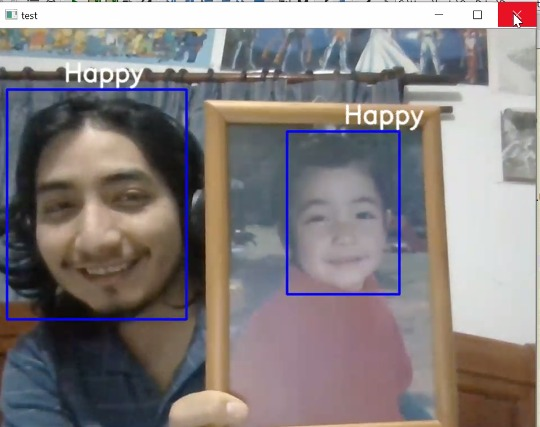

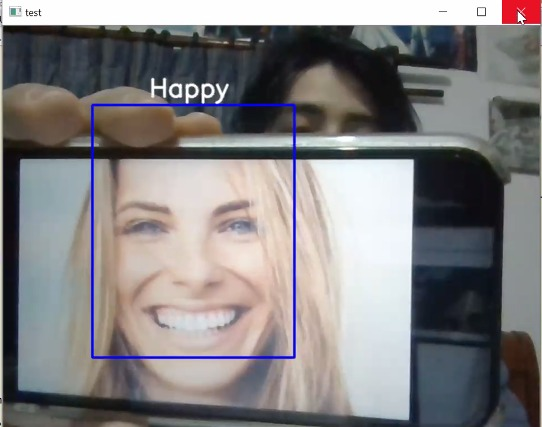

<a id="d"></a>
### 4. Conclusiones

---
[Regresar a contenido](#general)

De su análisis, qué pueden concluir? Qué posibilidades extras pudieran aplicarse o con qué finalidad realizaron el trabajo.

Primero, antes de empezar con cualquier tipo de entrenamiento realizamos un análisis exploratorio de los datos tanto de entrenamiento como de testing. Esto con la finalidad de darnos una idea si los datos de las emociones estaban cargados hacia un lado en específico (p.e. habían más imágenes de personas tristes en vez de personas felices).

Al momento de realizar el entrenamiento, nos dimos cuenta de que sería un proceso muy largo porque cada epoch tardaba alrededor de ~30-60 minutos en completarse, y eran 20 en total. Pero una vez terminado esta fase, tuvimos un archivo h5 resultante que nos agilizó en el proceso de pruebas de la red con la interfaz de usuario. Además, el % de accuracy de la nuestra red alcanzó el 80%, un número que consideramos muy bueno para fines de este proyecto. Este número probablemente pudo haber mejorado al cambiar las funciones de activación en los layers de nuestra red, pero creímos que mantenerlo en 80% estuvo bien por cuestiones de tiempo.

Al momento de utilizar la interfaz gráfica y hacer pruebas de nuestra red, confirmamos que en efecto tenía muy buenos resultados con las entradas que le ibamos dando (nuestros rostros a través de la webcam). 

Creemos que un proyecto así puede ser muy útil, por ejemplo, para detectar las emociones de los clientes en una tienda (de ropa, de supermercado, de productos para el hogar, etc.) y de esta forma medir el impacto que tiene el servicio/atención al cliente cuando estos son atendidos por los empleados del lugar. Tal vez con algún conjunto de datos más específico se pueda usar también para ayudar a diagnosticar enfermedades como depresión al analizar los rasgos faciales de personas que padecen esta enfermedad de forma crónica. Creemos que un proyecto así puede ser utilizado en una gran variedad de campos como el marketing y la medicina.